In [2]:
import tensorflow as tf
import numpy as np

In [3]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [4]:
layer = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer])

In [5]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [6]:
print("Training...")
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Training completed!")

Training...
Training completed!


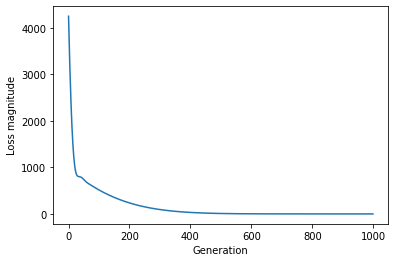

In [7]:
import matplotlib.pyplot as plt
plt.xlabel("Generation")
plt.ylabel("Loss magnitude")
plt.plot(history.history["loss"])

In [8]:
test = 25.0
resultado = model.predict([test])
print(str(test) + " degrees Celsius is... " + str(resultado) + " degrees Fahrenheit")

1/1 [==============================] - 0s 89ms/step
25.0 degrees Celsius is... [[76.87398]] degrees Fahrenheit


In [9]:
print("Internal model variables:")
print(layer.get_weights())

Internal model variables:
[array([[1.7982469]], dtype=float32), array([31.917807], dtype=float32)]


In [10]:
# Export model
!pip install tensorflowjs
!mkdir output
model.save('temperature_neural_network.h5')
!tensorflowjs_converter --input_format keras temperature_neural_network.h5 output
!ls output

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘output’: File exists
group1-shard1of1.bin  model.json
